1. Understandably that without the activation function it becomes a linear problem. Can you give me an example of a complicated NN problem that would require a activation function? Would this be something for monte carlo is my guess?
2. Difference between pytorch variable and tensor - does this still exist?

3. When you do that first layer process - from 4 to x # whats the determination for this?
4. What is Autograd for?https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
5. BCELoss versus Cross

Xavier Initalization?

https://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization

 Instead of initializing our weights with small numbers which are distributed randomly we initialize our weights with mean zero and variance of 2/(number of inputs + number of outputs)
 
  the weights in a network start too small, then the signal shrinks as it passes through each layer until it’s too tiny to be useful.
If the weights in a network start too large, then the signal grows as it passes through each layer until it’s too massive to be useful.
Xavier initialization makes sure the weights are ‘just right’, keeping the signal in a reasonable range of values through many layers.

In [ ]:
# !pip install torch
# !pip install torchvision

In [186]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

import torchvision
from torchvision import transforms, datasets #batching and working with data is already done for us so it has prepared data

import matplotlib.pyplot as plt
from PIL import Image

from sklearn import datasets as skdata


# multi-layer-perceptron

In [187]:
# tensor is a multi dimensional array

In [188]:
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

x*y

tensor([10.,  3.])

In [189]:
y = torch.rand([2,5])
print(y)
print('\n you want to do a flatten operation so you can do nn aka turn this 2 by 5 into a 1 by 10\n')
y = y.view([1,10])
print(y)

tensor([[0.1969, 0.4761, 0.6599, 0.2518, 0.8377],
        [0.9987, 0.6410, 0.1174, 0.2234, 0.4336]])

 you want to do a flatten operation so you can do nn aka turn this 2 by 5 into a 1 by 10

tensor([[0.1969, 0.4761, 0.6599, 0.2518, 0.8377, 0.9987, 0.6410, 0.1174, 0.2234,
         0.4336]])


# p2


In [190]:
train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

#handdrawn digits from 0 to 9 - 28 by 28

In [191]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True) #size is huge so ram can only handle so much. need a batch size to split it up to get to the full epoch - base 8 - bigger batch size = faster training
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

#shuffle lets you figure out generalized principles not just 1 ,2 ,3 ,4 ,5 ,6

#returns a list of x and y tensors.

In [192]:
for data in trainset:  #prints 1 batch and the 10 tensors of the output
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [193]:
x, y = data[0][0], data[1][0]
print(y)

tensor(0)


In [194]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


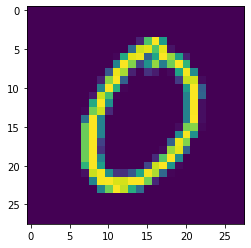

In [195]:
plt.imshow(data[0][0].view(28,28))
plt.show()

In [196]:
#balancing = as the optimizer is trying to decrease the loss - does not know how godo it can get but trying to decrease it as easy as possible. 0-9. if class imbalance and 60% are 3s in the dataset; then adjust weights that quickly predict 3's and get stuck. can add in momentum and modify weights of specific weights (but want it as balanced as possible)

In [197]:
total = 0 
counter = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0 }

for i in trainset:
    xs, ys = data
    for y in ys:
        counter[int(y)] +=1 
        total +=1
        
print(counter)

{0: 12000, 1: 12000, 2: 0, 3: 12000, 4: 0, 5: 6000, 6: 0, 7: 12000, 8: 0, 9: 6000}


In [198]:
for i in counter:
    print(f'{i}: {counter[i]/total*100}')

0: 20.0
1: 20.0
2: 0.0
3: 20.0
4: 0.0
5: 10.0
6: 0.0
7: 20.0
8: 0.0
9: 10.0


In [199]:
m = nn.Linear(20, 30) #THE INPUT is 20 the output is 30
input = torch.randn(128, 20) #you put in a torch with random #'s of a size of 128x20
output = m(input) #transforming this 128x20 and 
print(output.size())
torch.Size([128, 20])

torch.Size([128, 30])


torch.Size([128, 20])

# p3 

Next Steps for Week 4:
Multilayer Perceptron using Iris dataset (1-2 hours) 

## Iris Dataset to make a multilayer preceptrion / image net 5-10 classes and build a CNN architecture
### for multi-layer perceptron - simple classifier --> Iris Dataset


## CNN from ImageNet prelabeled dataset (3-5 days) using PyTorch on Google Collab
### Weight = Kernal in CNN after traversing the image

striding, kernel learning ,residual block (res net became famous because of this) - incorporte new info 
from the original information
travesing the image of the kernel







Adam - variant of stocastic descent - momentum - instances where stuck at a minima but no the global minimum - extra coefficient to get out of the local minimas - saddle point

multi-layer perceptron and basic CNN classifier + RNN's classifier -> thus use gated RNN's LSTMS - prevent gradients exploding or diminish GLU or LSTMS- fundamental understanding 
- use PyTorch


# MLP - Iris Example - Base Logistic Regression

In [200]:
iris = skdata.load_iris()


In [201]:
print(iris.feature_names)
print(iris.data.shape)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


In [202]:
print(iris.target.shape)
print(iris.target_names)

(150,)
['setosa' 'versicolor' 'virginica']


In [203]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [204]:
iris_data = iris.data



In [205]:
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

In [206]:
iris_data.shape
#has data on 150 irises of the 4 features above

(150, 4)

In [207]:
features = iris.feature_names
print(features)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [208]:
iris.target_names #one hot encoding

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [209]:
iris_y = iris.target

In [210]:
iris_data[:5] # shows first 5

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [41]:
x, y  = iris_data[0][0], iris_data[1][0]
print(x,y)

5.1 4.9


In [42]:
iris_data[0].shape

(4,)

In [43]:
iris_data.shape

(150, 4)

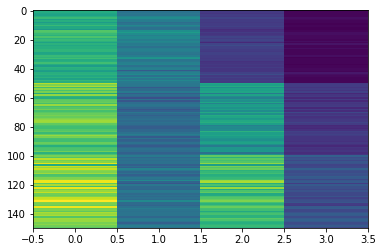

In [44]:
plt.imshow(iris_data, aspect = 'auto')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(iris_data, iris_y, test_size = 0.2, random_state = 0)

In [47]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(120, 4) (30, 4) (120,) (30,)


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(xtrain,ytrain)

/Users/heoun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/heoun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
ytest_pred = lr.predict(xtest)

In [52]:
ytest_pred_prob = lr.predict_proba(xtest)

In [53]:
lr.score(xtest,ytest)

0.9666666666666667

In [54]:
report = classification_report(ytest, ytest_pred, digits = 3)
report.split('\n')

['              precision    recall  f1-score   support',
 '',
 '           0      1.000     1.000     1.000        11',
 '           1      1.000     0.923     0.960        13',
 '           2      0.857     1.000     0.923         6',
 '',
 '    accuracy                          0.967        30',
 '   macro avg      0.952     0.974     0.961        30',
 'weighted avg      0.971     0.967     0.967        30',
 '']

# MLP - Iris Example - NN

Convert data from .csv file to a numpy array (Now this is your input data of size 150 x 4)
Now make a random split of 120 samples as train and rest as test ( Note it has to be random)
Now, your train data is of size 120 x 4 and test is 30 x 4.
Resize the train and test array to a tensor of size N x N. You can use some pre-built methods in TF / keras to resize the arrays.
Now you have a input (train and test) of size N X N, apply consecutive conv layers + relu + pool and a couple of fc layers in the end.
Use a mean squared error as you have real-valued data and a good optimizer like Adam.

In [183]:
iris_data.shape


(150, 4)

In [184]:
iris_data.dtype

dtype('float64')

In [185]:
xtrain, xtest, ytrain, ytest = train_test_split(iris_data, iris_y, test_size = 0.2, random_state = 0)

In [1]:

# iris_dim = int(iris_data.shape[0]*.8)
# c = numpy.c_[iris_data.reshape(len(a), -1), b.reshape(len(b), -1)]

# #np.random.shuffle(iris_data)
# xtrain, xtest = iris_data[:iris_dim], iris_data[iris_dim+1:] #instead of doing this convert this to a tensor?

In [59]:
iris_data[1]

array([4.9, 3. , 1.4, 0.2])

# This is using the One Hot Encoding Approach - It does not work because of the issue of it being greater than the bounds of 0-1. Ask Shantanu

In [101]:
from keras.utils import to_categorical

In [102]:
iris_y_categ = to_categorical(iris_y) #need to remove onehot

In [103]:
iris_y_categ[0]

array([1., 0., 0.], dtype=float32)

In [104]:
x_iris_tensor = torch.from_numpy(iris_data).float()
y_iris_tensor = torch.from_numpy(iris_y_categ).float()
#y_iris_tensor = torch.from_numpy(iris_y)

In [107]:
x_iris_tensor.shape

torch.Size([150, 4])

In [106]:
y_iris_tensor.shape

torch.Size([150, 3])

In [116]:
class net(nn.Module): #inheriting the Module from torch.nn.Module
    ''' 
    This has the basic components of the NN
    '''
    def __init__(self, batch):
        super(net, self).__init__()
        self.batch = 10

        self.relu = torch.nn.ReLU() #adds the relu function - relu(output)
        self.drop = nn.Dropout()
        self.mlp1 = nn.Linear(4, 64) #image is 28x28 or in this case 4 columns of dependent variables #input, output, bias is auto True y = xA^t + b
        self.mlp2 = nn.Linear(64, 128)
        self.mlp3 = nn.Linear(128, 3) #need final results to be the 3 different flowers availble
    def forward(self, x):
        layer1 = self.relu(self.mlp1(x))
        layer11 = self.drop(layer1)
        layer2 = self.relu(self.mlp2(layer11))
        layer22 = self.drop(layer2)
        y_prediction = self.relu(self.mlp3(layer22))
        return y_prediction
    


In [117]:
#binay cross entropy loss function - backprop - how we measure our loss
loss_fun=torch.nn.CrossEntropyLoss()

#BCELoss(size_average=True)
mlp = net(10).float()
#SGD optimizer
#this is the sgd optimizer that then gets to the loss function learning rate of 0.01, momentum is  #learning rate
opt= torch.optim.Adam(mlp.parameters(), lr = 0.01)
#torch.optim.SGD(mlp.parameters(),lr=0.01, momentum = 0.9) 
batch_size = 10

In [118]:
permutation = torch.randperm(x_iris_tensor.size()[0]) #Returns a random permutation of integers from 0 to n - 1 or in this case the 150 available


In [119]:
# for input, target in dataset:
#     optimizer.zero_grad()
#     output = model(input)
#     loss = loss_fn(output, target)
#     loss.backward()
#     optimizer.step()

In [120]:
#training
loss_array = [] 
for epoch in range(100):
    print("Epoch: " + str(epoch))
    #for i in range(0,x_iris_tensor.size()[0],batch_size):
        #print("batch: " + str(i))
        #indices = permutation[i:i+batch_size]
       # batch_x, batch_y = x_iris_tensor[indices], y_iris_tensor[indices]
    y_pred_val=mlp.forward(x_iris_tensor)

    print(y_pred_val.shape)
    print(y_iris_tensor.shape)
    print(y_pred_val)

    loss=loss_fun(y_pred_val,y_iris_tensor)
    loss_array.append(loss)

    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')

    opt.zero_grad()
    loss.backward()
    opt.step()

Epoch: 0
torch.Size([150, 3])
torch.Size([150, 3])
tensor([[0.0191, 0.0000, 0.0000],
        [0.1348, 0.4057, 0.0000],
        [0.0000, 0.2105, 0.0000],
        [0.3385, 0.0042, 0.0000],
        [0.0837, 0.3435, 0.0000],
        [0.0000, 0.7128, 0.0000],
        [0.0000, 0.5377, 0.0000],
        [0.0798, 0.3776, 0.0000],
        [0.0000, 0.3944, 0.0000],
        [0.0056, 0.0000, 0.0944],
        [0.1504, 0.1633, 0.0000],
        [0.0000, 0.0050, 0.0000],
        [0.7247, 0.2447, 0.0000],
        [0.0000, 0.2127, 0.0000],
        [0.9271, 0.2957, 0.0000],
        [0.0000, 0.4526, 0.0000],
        [0.4679, 0.5142, 0.0000],
        [1.0226, 1.4789, 0.0000],
        [0.0103, 0.0133, 0.0000],
        [0.0000, 0.0646, 0.0000],
        [0.0028, 0.1291, 0.0000],
        [0.1869, 0.3605, 0.0000],
        [0.2845, 0.2483, 0.0000],
        [0.0740, 0.0000, 0.0000],
        [0.6838, 0.9579, 0.0000],
        [0.2973, 0.2497, 0.0000],
        [0.1129, 0.2170, 0.0000],
        [0.5016, 0.5606, 0.0000

RuntimeError: 1D target tensor expected, multi-target not supported

In [ ]:
loss_array

# This is using the One column with different vars Approach

Using TensorFlow backend.


In [235]:
y_iris_tensor.shape

torch.Size([150])

In [236]:
#iris_y_formated = np.expand_dims(iris_y, axis = 1)


In [237]:
x_iris_tensor = torch.from_numpy(iris_data).float()
# y_iris_tensor = torch.from_numpy(iris_y_categ).float()
#y_iris_tensor = np.squeeze(y_iris_tensor)
y_iris_tensor = torch.LongTensor(iris_y)

In [238]:
x_iris_tensor.shape

torch.Size([150, 4])

In [239]:
y_iris_tensor.shape

torch.Size([150])

In [280]:
class net(nn.Module): #inheriting the Module from torch.nn.Module
    ''' 
    This has the basic components of the NN
    '''
    def __init__(self, batch):
        super(net, self).__init__()
        self.batch = 10

        self.relu = torch.nn.ReLU() #adds the relu function - relu(output)
        self.drop = nn.Dropout()
        self.mlp1 = nn.Linear(4, 128) #image is 28x28 or in this case 4 columns of dependent variables #input, output, bias is auto True y = xA^t + b
        self.mlp2 = nn.Linear(128, 12)
        self.mlp3 = nn.Linear(12, 3) #need final results to be the 3 different flowers availble
    def forward(self, x):
        layer1 = self.relu(self.mlp1(x))
        layer11 = self.drop(layer1)
        layer2 = self.relu(self.mlp2(layer11))
        layer22 = self.drop(layer2)
        y_prediction = self.relu(self.mlp3(layer2))
        return y_prediction
    


In [281]:
#binay cross entropy loss function - backprop - how we measure our loss
#loss_fun=torch.nn.BCELoss(reduce = False)
loss_fun=torch.nn.CrossEntropyLoss()
mlp = net(10).float()
#SGD optimizer
#this is the sgd optimizer that then gets to the loss function learning rate of 0.01, momentum is  #learning rate
opt= torch.optim.SGD(mlp.parameters(),lr=0.01, momentum = 0.9) 
batch_size = 10

In [282]:
permutation = torch.randperm(x_iris_tensor.size()[0]) #Returns a random permutation of integers from 0 to n - 1 or in this case the 150 available





In [283]:
# for input, target in dataset:
#     optimizer.zero_grad()
#     output = model(input)
#     loss = loss_fn(output, target)
#     loss.backward()
#     optimizer.step()

In [284]:
#training
loss_array = [] 
for epoch in range(100):

#     for i in range(0,x_iris_tensor.size()[0],batch_size):
#         print("batch: " + str(i))
#         indices = permutation[i:i+batch_size]
#         batch_x, batch_y = x_iris_tensor[indices], y_iris_tensor[indices]
        y_pred_val=mlp.forward(x_iris_tensor)

        loss=loss_fun(y_pred_val,y_iris_tensor)
        loss_array.append(loss)

        if epoch % 10 == 0:
            print(f'Epoch: {epoch} Loss: {loss}')

        opt.zero_grad()
        loss.backward()
        opt.step()

Epoch: 0 Loss: 1.1238269805908203
Epoch: 10 Loss: 1.019579529762268
Epoch: 20 Loss: 0.8482896685600281
Epoch: 30 Loss: 0.6058668494224548
Epoch: 40 Loss: 0.4494011402130127
Epoch: 50 Loss: 0.4307299256324768
Epoch: 60 Loss: 0.37817659974098206
Epoch: 70 Loss: 0.29017290472984314
Epoch: 80 Loss: 0.2940356731414795
Epoch: 90 Loss: 0.28316938877105713


In [274]:
loss_array

[tensor(1.1287, grad_fn=<NllLossBackward>),
 tensor(1.1261, grad_fn=<NllLossBackward>),
 tensor(1.1212, grad_fn=<NllLossBackward>),
 tensor(1.1148, grad_fn=<NllLossBackward>),
 tensor(1.1074, grad_fn=<NllLossBackward>),
 tensor(1.0998, grad_fn=<NllLossBackward>),
 tensor(1.0919, grad_fn=<NllLossBackward>),
 tensor(1.0838, grad_fn=<NllLossBackward>),
 tensor(1.0757, grad_fn=<NllLossBackward>),
 tensor(1.0680, grad_fn=<NllLossBackward>),
 tensor(1.0608, grad_fn=<NllLossBackward>),
 tensor(1.0538, grad_fn=<NllLossBackward>),
 tensor(1.0472, grad_fn=<NllLossBackward>),
 tensor(1.0409, grad_fn=<NllLossBackward>),
 tensor(1.0369, grad_fn=<NllLossBackward>),
 tensor(1.0381, grad_fn=<NllLossBackward>),
 tensor(1.0388, grad_fn=<NllLossBackward>),
 tensor(1.0373, grad_fn=<NllLossBackward>),
 tensor(1.0336, grad_fn=<NllLossBackward>),
 tensor(1.0279, grad_fn=<NllLossBackward>),
 tensor(1.0210, grad_fn=<NllLossBackward>),
 tensor(1.0141, grad_fn=<NllLossBackward>),
 tensor(1.0091, grad_fn=<NllLoss